## Figure 4 Plot 
Using patchwork to combine the plots into a single figure for Manuscript

In [1]:
suppressPackageStartupMessages(suppressWarnings(library(ggplot2))) # plotting
suppressPackageStartupMessages(suppressWarnings(library(dplyr))) # data manipulation
suppressPackageStartupMessages(suppressWarnings(library(patchwork))) # figure composition
suppressPackageStartupMessages(suppressWarnings(library(cowplot))) # figure composition
suppressPackageStartupMessages(suppressWarnings(library(RcppTOML))) # parsing config file
suppressPackageStartupMessages(suppressWarnings(library(pheatmap))) # heatmap
suppressPackageStartupMessages(suppressWarnings(library(lattice))) # heatmap
suppressPackageStartupMessages(suppressWarnings(library(RColorBrewer))) # heatmap
suppressPackageStartupMessages(suppressWarnings(library(gplots))) # heatmap
suppressPackageStartupMessages(suppressWarnings(library(ComplexHeatmap))) # heatmap
suppressPackageStartupMessages(suppressWarnings(library(ggplotify))) # grob
suppressPackageStartupMessages(suppressWarnings(library(viridis))) # color
suppressPackageStartupMessages(suppressWarnings(library(platetools))) # make plate plot
suppressPackageStartupMessages(suppressWarnings(library(circlize))) 
suppressPackageStartupMessages(suppressWarnings(library(reshape2))) # data manipulation
suppressPackageStartupMessages(suppressWarnings(library(stringr))) # string manipulation
suppressPackageStartupMessages(suppressWarnings(library(purrr))) # data manipulation
source("../../utils/figure_themes.r")

In [2]:
# set the cell type
cell_type <- "PBMC"


In [3]:
# set the path to the data files
df_stats_path <- file.path(
    paste0("../../../6.bulk_Morphology_Elastic_Network/2.test_model/results/regression/",cell_type,"/aggregated_with_nomic/model_stats.csv"
    )
    )
df_variance_path <- file.path(
    paste0("../../../6.bulk_Morphology_Elastic_Network/2.test_model/results/regression/",cell_type,"/aggregated_with_nomic/variance_r2_stats.csv"
    )
)

# set the path to the figure output
enet_cp_fig_path <- paste0("../figures/regression/",cell_type,"/aggregated_with_nomic/")
# if path does not exist, create it
if (!file.exists(dirname(enet_cp_fig_path))) {
    print(dirname(enet_cp_fig_path))
    dir.create(dirname(enet_cp_fig_path), recursive = TRUE)
}

# read the data
df_stats <- read.csv(df_stats_path)
df_variance <- read.csv(df_variance_path)


In [4]:
head(df_stats)
head(df_variance)
# remove '[]' from the string in the column
df_variance$r2 <- gsub("\\[|\\]", "", df_variance$r2)
# set the column as numeric
df_variance$r2 <- as.numeric(df_variance$r2)
head(df_variance)


,explained_variance,neg_mean_absolute_error,neg_mean_squared_error,well,treatment,r2,cytokine,data_split,shuffle,predicted_value,actual_value,log10_neg_mean_absolute_error,log10_neg_mean_squared_error,log10_explained_variance
,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,-0.12876296,-0.016579900,B05,LPS_Nigericin_100.000_1.0_DMSO_0.025,0,GFbeta,train_data,final,0.4969174,0.6226146,0.8902090,1.7804181,0
2,1,-0.09606601,-0.009228678,B08,LPS_0.010_DMSO_0.025,0,GFbeta,train_data,final,0.4969174,0.4031387,1.0174302,2.0348605,0
3,1,-0.21557860,-0.046474132,B10,LPS_Nigericin_100.000_1.0_DMSO_0.025,0,GFbeta,train_data,final,0.4969174,0.7073632,0.6663944,1.3327887,0
4,1,-0.57668367,-0.332564053,C02,LPS_0.100_DMSO_0.025,0,GFbeta,train_data,final,0.4969174,0.1619233,0.2390623,0.4781247,0
5,1,-0.11961401,-0.014307512,C05,LPS_Nigericin_100.000_3.0_DMSO_0.025,0,GFbeta,train_data,final,0.4969174,0.6136835,0.9222179,1.8444359,0
6,1,-0.31175502,-0.097191194,C06,DMSO_0.100_DMSO_0.025,0,GFbeta,train_data,final,0.4969174,0.1925851,0.5061865,1.0123731,0


,cytokine,data_split,shuffle,predicted_value,actual_value,r2
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,XCL1(Lymphotactin),test_data,final,0.020480504,0.02890534,[0.65955376]
2,XCL1(Lymphotactin),train_data,final,0.019216161,0.03922649,[0.59506056]
3,FGF-19,test_data,shuffled_baseline,0.011574992,0.04871310,[-0.12988404]
4,FGF-19,train_data,shuffled_baseline,0.013018679,0.02982844,[-0.81728511]
5,IF-epsilon,test_data,final,0.006243045,0.03106936,[0.13484578]
6,IF-epsilon,train_data,final,0.007030569,0.03819321,[0.31434654]


,cytokine,data_split,shuffle,predicted_value,actual_value,r2
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,XCL1(Lymphotactin),test_data,final,0.020480504,0.02890534,0.6595538
2,XCL1(Lymphotactin),train_data,final,0.019216161,0.03922649,0.5950606
3,FGF-19,test_data,shuffled_baseline,0.011574992,0.04871310,-0.1298840
4,FGF-19,train_data,shuffled_baseline,0.013018679,0.02982844,-0.8172851
5,IF-epsilon,test_data,final,0.006243045,0.03106936,0.1348458
6,IF-epsilon,train_data,final,0.007030569,0.03819321,0.3143465


In [5]:
df_variance$shuffle <- gsub("final", "Final\n ", df_variance$shuffle)
df_variance$shuffle <- gsub("shuffled_baseline", "Shuffled\nbaseline", df_variance$shuffle)
df_variance$data_split <- gsub("test_data", "Test Data", df_variance$data_split)
df_variance$data_split <- gsub("train_data", "Train Data", df_variance$data_split)

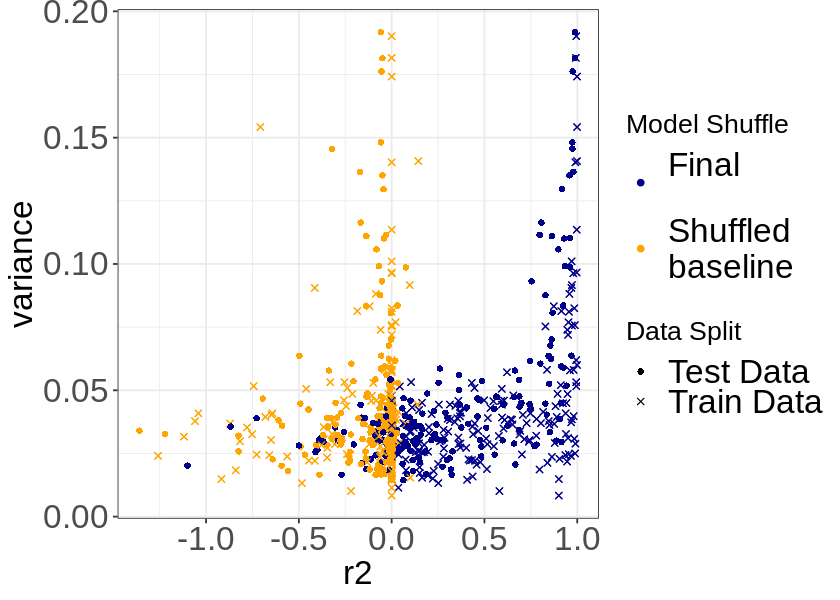

In [6]:
# set plot size 
options(repr.plot.width=7, repr.plot.height=5)
# set output path
global_variance_r2_path <- file.path(paste0(enet_cp_fig_path,"global_variance_r2.png"))
# if path does not exist, create it
if (!file.exists(dirname(global_variance_r2_path))) {
    print(dirname(global_variance_r2_path))
    dir.create(dirname(global_variance_r2_path), recursive = TRUE)
}
# plot df_var df
variance_r2_plot_global <- (
    ggplot(df_variance, aes(x=r2, y=actual_value,col=shuffle, shape = data_split)) 
    + geom_point() 
    + theme_bw()
    + labs(x="r2", y="variance") 
    # update the legend title
    + labs(shape = "Data Split", col = "Model Shuffle")
    # alter the text size of the legend title
    + figure_theme
    + scale_shape_manual(values=c(16, 4))
    # change the color of the points
    + scale_color_manual(values=c("Darkblue", "orange"))
    
)
variance_r2_plot_global
ggsave(global_variance_r2_path, variance_r2_plot_global, width=5, height=5, dpi=500)



Warning message:
“Removed 610 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 610 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 610 rows containing missing values (`geom_point()`).”


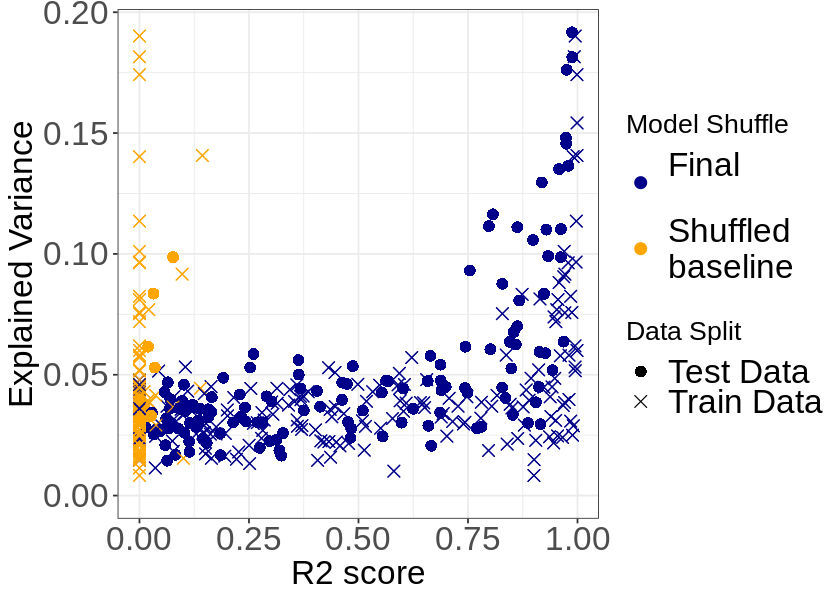

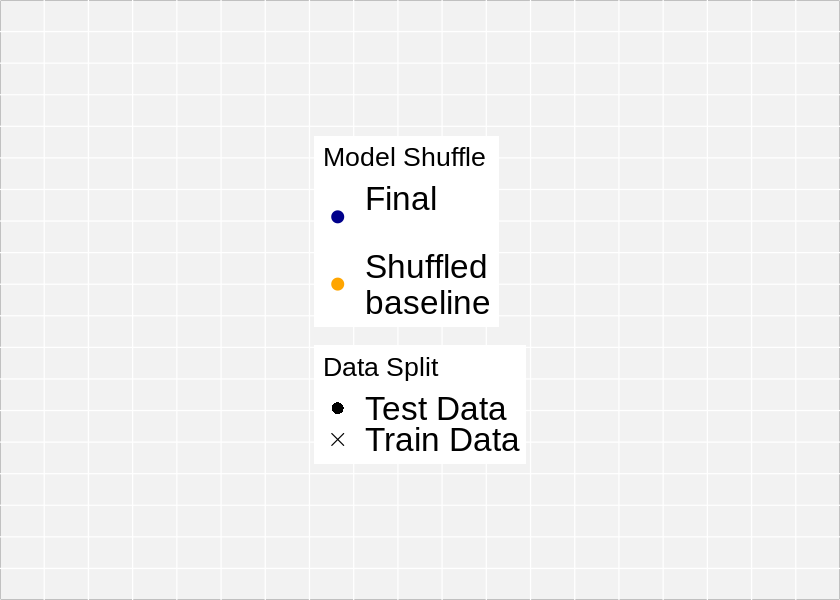

In [7]:
local_variance_r2_path <- file.path(paste0(enet_cp_fig_path,"local_variance_r2.png"))
local_variance_r2_legend_path <- file.path(paste0(enet_cp_fig_path,"local_variance_r2_legend.png"))
# if path does not exist, create it
if (!file.exists(dirname(local_variance_r2_path))) {
    print(dirname(local_variance_r2_path))
    dir.create(dirname(local_variance_r2_path), recursive = TRUE)
}
# same plot but only in the positive quadrant
variance_r2_plot_local <- (
    ggplot(df_variance, aes(x=r2, y=actual_value, col=shuffle, shape = data_split)) 
    + geom_point(size=3)
    + labs(x="R2 score", y="Explained Variance") 
    + theme_bw()
    + xlim(0, max(df_variance$r2))
    + ylim(0, max(df_variance$actual_value))
    # change the x and y axis text size
    + scale_shape_manual(values=c(16, 4))
    + labs(shape = "Data Split", col = "Model Shuffle")
    # make legend points bigger
    + guides(
        colour = guide_legend(override.aes = list(size=3)),
        shape = guide_legend(override.aes = list(size=3))
    )
    + figure_theme
    # change the legend values
    + scale_color_manual(values=c("Darkblue", "orange"))

)
legend <- get_legend(variance_r2_plot_local)
ggsave(local_variance_r2_path, variance_r2_plot_local, width=5, height=5, dpi=500)
variance_r2_plot_local
plot(legend)


In [8]:
df_stats$shuffle_plus_data_split <- paste0(df_stats$shuffle, "_", df_stats$data_split)
# replace 'final_test_data' with 'Final + Test' and 'final_train_data' with 'Final + Train' 
df_stats$shuffle_plus_data_split <- gsub("final_test_data", "Final (Test)", df_stats$shuffle_plus_data_split)
df_stats$shuffle_plus_data_split <- gsub("final_train_data", "Final (Train)", df_stats$shuffle_plus_data_split)
df_stats$shuffle_plus_data_split <- gsub("shuffled_baseline_test_data", "Shuffled (Test)", df_stats$shuffle_plus_data_split)
df_stats$shuffle_plus_data_split <- gsub("shuffled_baseline_train_data", "Shuffled (Train)", df_stats$shuffle_plus_data_split)


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 478 rows containing non-finite values (`stat_smooth()`).”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 478 rows containing non-finite values (`stat_smooth()`).”


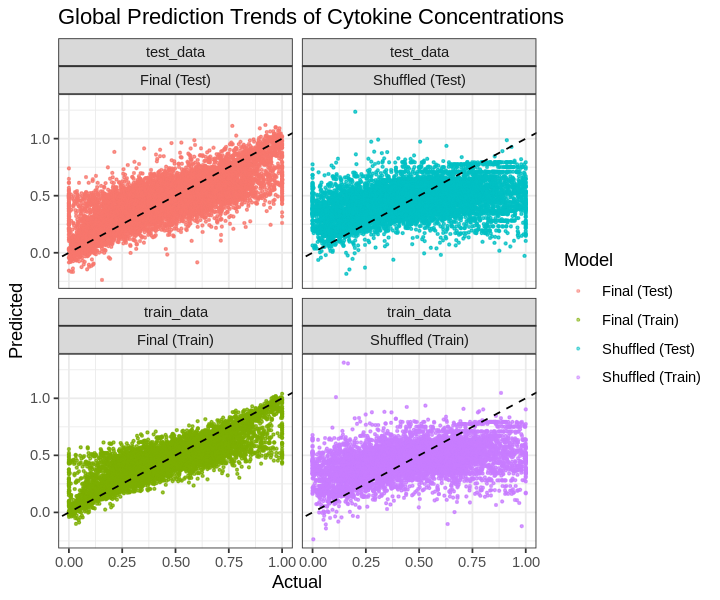

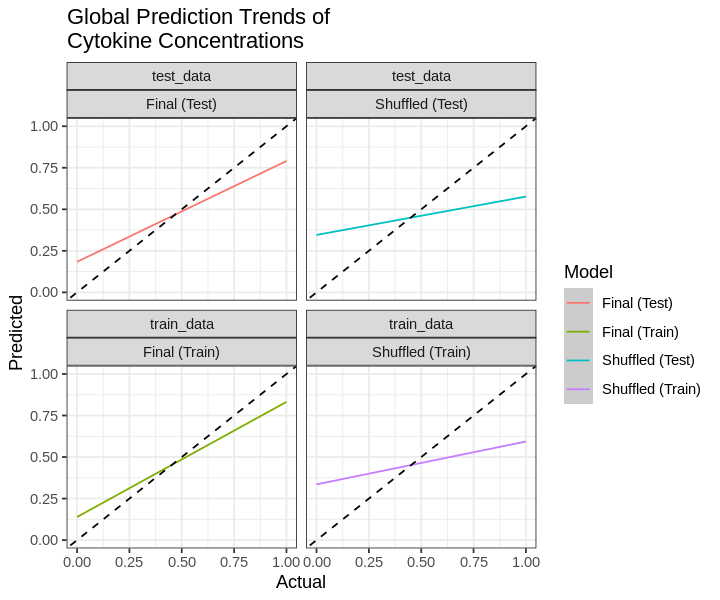

In [9]:
options(repr.plot.width=6, repr.plot.height=5)
# set output path
global_prediction_trend_path <- file.path(paste0(enet_cp_fig_path,"global_prediction_trend.png"))
# if path does not exist, create it
if (!file.exists(dirname(global_prediction_trend_path))) {
    print(dirname(global_prediction_trend_path))
    dir.create(dirname(global_prediction_trend_path), recursive = TRUE)
}
# plot the data
global_prediction_trend_scatter <- (
    ggplot(df_stats, aes(x=actual_value, y=predicted_value, col=shuffle_plus_data_split))
    + geom_point(alpha=0.5, size=0.5) 
    # add geom smooth with each line being a different color
    + labs(x="Actual", y="Predicted") 
    + theme_bw()
    + labs(title="Global Prediction Trends of Cytokine Concentrations")
    # add y=x line
    + geom_abline(intercept = 0, slope = 1, linetype="dashed", color="black")
    + facet_wrap(data_split~shuffle_plus_data_split, ncol=2)
    + labs(color="Model", hjust=0.5)
)

# save the plot
ggsave(global_prediction_trend_path, global_prediction_trend_scatter, width=5, height=5, dpi=500)
global_prediction_trend_scatter

global_prediction_trend_line <- (
    ggplot(df_stats, aes(x=actual_value, y=predicted_value, col=shuffle_plus_data_split)) 
    # add geom smooth with each line being a different color
    + geom_smooth(method="lm", se=TRUE, alpha=0.5, size=0.5, aes(col=shuffle_plus_data_split))
    # make colors different for each line
    + scale_fill_gradientn(colours = viridis(10))
    + labs(x="Actual", y="Predicted") 
    + theme_bw()
    + labs(title="Global Prediction Trends of \nCytokine Concentrations")
    # add y=x line
    + geom_abline(intercept = 0, slope = 1, linetype="dashed", color="black")
    + facet_wrap(data_split~shuffle_plus_data_split, ncol=2)
    + ylim(0, 1)
    + xlim(0, 1)
    + labs(color="Model", hjust=0.5)
)
ggsave(global_prediction_trend_path, global_prediction_trend_line, width=5, height=5, dpi=500)
global_prediction_trend_line


In [10]:
pred_v_actual_plot <- function(df, cytokine){
    tmp_df <- df[df$cytokine == cytokine,]
    p <- (
        ggplot(tmp_df, aes(x=actual_value, y=predicted_value, col=shuffle_plus_data_split))
        + geom_point() 
        + theme_bw() 
        + geom_smooth(method=lm, se=TRUE, formula = y ~ x, alpha=0.5, size=0.5)
        + labs(x=paste0("Actual ",cytokine), y=paste0("Predicted ", cytokine)) 

        + ggtitle(cytokine)
        + ylim(0, 1)
        + xlim(0, 1)
        + figure_theme
        + labs(color="Model", hjust=0.5)
        # change legend title
        # make kegend key background white
        + guides(color = guide_legend(override.aes = list(fill = NA)),
            linetype = guide_legend(override.aes = list(fill = NA)))
        + theme(legend.key = element_rect(fill = "white"))
        )
    return(p)
}


Warning message:
“Removed 26 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 26 rows containing missing values (`geom_point()`).”


Warning message:
“Removed 28 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 28 rows containing missing values (`geom_point()`).”


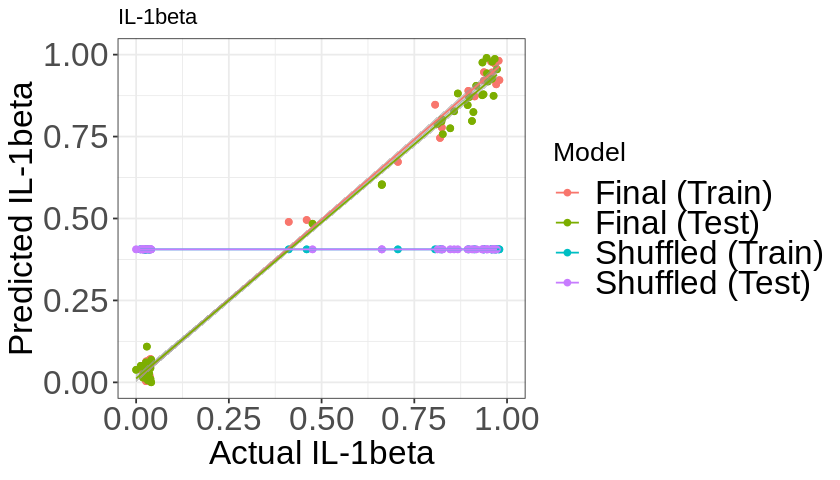

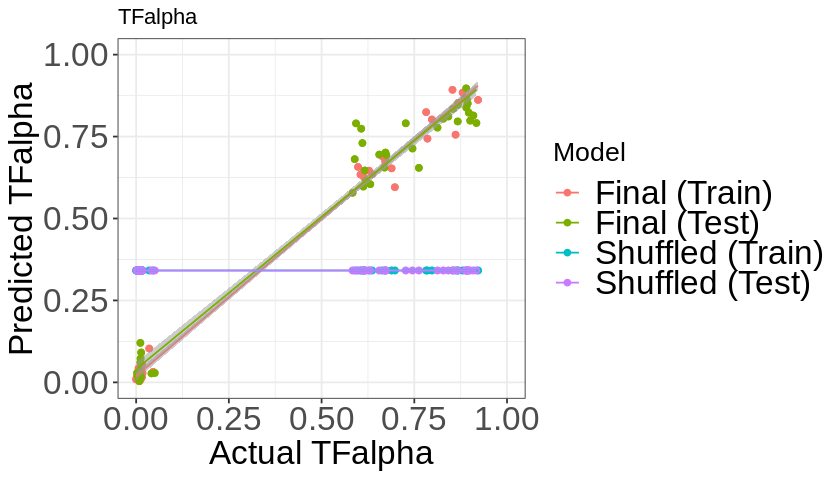

In [11]:
# df_stats factor levels
df_stats$shuffle_plus_data_split <- factor(
    df_stats$shuffle_plus_data_split,
    levels = c(
        "Final (Train)",
        "Final (Test)",
        "Shuffled (Train)",
        "Shuffled (Test)"
    )
)

enet_cp_fig <- file.path(paste0(enet_cp_fig_path,"Predicted_vs_Actual_all_cytokines.png"))
# set plot size
width <- 7
height <- 4
options(repr.plot.width=width, repr.plot.height=height)
# subset the data to only include the cytokine of interest

IL1beta_a_v_p <- pred_v_actual_plot(df_stats, "IL-1beta")
TNFalpha_a_v_p <- pred_v_actual_plot(df_stats, "TFalpha")

IL1beta_a_v_p
TNFalpha_a_v_p


### Model Performances

In [12]:
# calculate the se of each metric for each shuffle, data_split, and cytokine in R
agg_df <- aggregate(log10_neg_mean_absolute_error ~ shuffle + data_split + cytokine + treatment, df_stats, function(x) c(mean = mean(x), sd = sd(x)))
# split the log10_neg_mean_absolute_error column into two columns
agg_df <- cbind(agg_df, agg_df$log10_neg_mean_absolute_error)
# remove the log10_neg_mean_absolute_error column by name
agg_df <- agg_df[, !names(agg_df) %in% c('log10_neg_mean_absolute_error')]
# rename the columns 
colnames(agg_df) <- c("shuffle", "data_split", "cytokine", "treatment","mean_log10_neg_mean_absolute_error", "sd_log10_neg_mean_absolute_error")


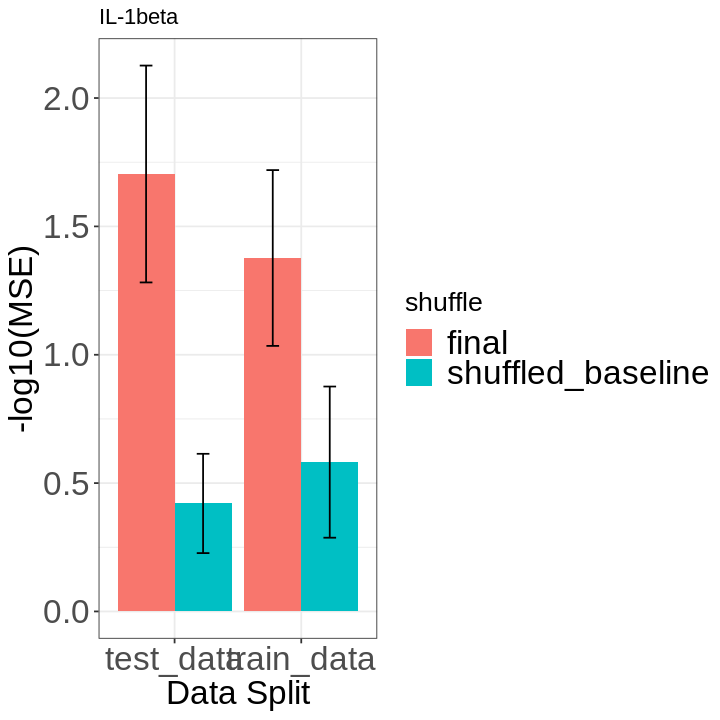

In [13]:
# per cytokine graph
file_path <- file.path(paste0(enet_cp_fig_path))
# if path does not exist, create it
if (!file.exists(dirname(file_path))) {
    print(dirname(file_path))
    dir.create(dirname(file_path), recursive = TRUE)
}
file=file.path(paste0(file_path,"individual_cytokine_prediction_metric.png"))

cytokine <- "IL-1beta"
# set output path
# set plot size
width <- 6
height <- 6
options(repr.plot.width=width, repr.plot.height=height)
# plot a bar plot of the mean log10_neg_mean_absolute_error for each data split, cytokine, and shuffle with error bars
tmp_df <- agg_df[agg_df$cytokine == cytokine,]
# get the mean and sd of the log10_neg_mean_absolute_error for each data split, cytokine, and shuffle
tmp_df <- aggregate(mean_log10_neg_mean_absolute_error ~ shuffle + data_split, tmp_df, function(x) c(mean = mean(x), sd = sd(x)))
# split the log10_neg_mean_absolute_error column into two columns
tmp_df <- cbind(tmp_df, tmp_df$mean_log10_neg_mean_absolute_error)
# drop the log10_neg_mean_absolute_error column by name
tmp_df <- tmp_df[, !names(tmp_df) %in% c('mean_log10_neg_mean_absolute_error')]
# split the mean_log10_neg_mean_absolute_error column into two columns

model_performance_il1b <- (
    ggplot(tmp_df, aes(x=data_split, y=mean, fill=shuffle)) 
        + geom_bar(stat="identity", position=position_dodge()) 
        + geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), width=.2, position=position_dodge(.9)) 
        + labs(x="Data Split", y="log10_neg_mean_absolute_error") 
        + ggtitle(cytokine)
        + theme_bw()
        + figure_theme
        + ylab("-log10(MSE)")
)
model_performance_il1b


### Boxplot

In [14]:
head(df_stats)

,explained_variance,neg_mean_absolute_error,neg_mean_squared_error,well,treatment,r2,cytokine,data_split,shuffle,predicted_value,actual_value,log10_neg_mean_absolute_error,log10_neg_mean_squared_error,log10_explained_variance,shuffle_plus_data_split
,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,1,-0.12876296,-0.016579900,B05,LPS_Nigericin_100.000_1.0_DMSO_0.025,0,GFbeta,train_data,final,0.4969174,0.6226146,0.8902090,1.7804181,0,Final (Train)
2,1,-0.09606601,-0.009228678,B08,LPS_0.010_DMSO_0.025,0,GFbeta,train_data,final,0.4969174,0.4031387,1.0174302,2.0348605,0,Final (Train)
3,1,-0.21557860,-0.046474132,B10,LPS_Nigericin_100.000_1.0_DMSO_0.025,0,GFbeta,train_data,final,0.4969174,0.7073632,0.6663944,1.3327887,0,Final (Train)
4,1,-0.57668367,-0.332564053,C02,LPS_0.100_DMSO_0.025,0,GFbeta,train_data,final,0.4969174,0.1619233,0.2390623,0.4781247,0,Final (Train)
5,1,-0.11961401,-0.014307512,C05,LPS_Nigericin_100.000_3.0_DMSO_0.025,0,GFbeta,train_data,final,0.4969174,0.6136835,0.9222179,1.8444359,0,Final (Train)
6,1,-0.31175502,-0.097191194,C06,DMSO_0.100_DMSO_0.025,0,GFbeta,train_data,final,0.4969174,0.1925851,0.5061865,1.0123731,0,Final (Train)


In [15]:
# calculate the se of each metric for each shuffle, data_split, and cytokine in R
agg_df <- aggregate(r2 ~ shuffle_plus_data_split, df_stats, function(x) c(mean = mean(x), sd = sd(x)))
# split the log10_neg_mean_absolute_error column into two columns
agg_df <- cbind(agg_df, agg_df$r2)
# remove the log10_neg_mean_absolute_error column by name
agg_df <- agg_df[, !names(agg_df) %in% c('r2')]
# rename the columns 
colnames(agg_df) <- c("shuffle_plus_data_split","mean_r2", "sd_r2")

head(df_stats)

,explained_variance,neg_mean_absolute_error,neg_mean_squared_error,well,treatment,r2,cytokine,data_split,shuffle,predicted_value,actual_value,log10_neg_mean_absolute_error,log10_neg_mean_squared_error,log10_explained_variance,shuffle_plus_data_split
,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,1,-0.12876296,-0.016579900,B05,LPS_Nigericin_100.000_1.0_DMSO_0.025,0,GFbeta,train_data,final,0.4969174,0.6226146,0.8902090,1.7804181,0,Final (Train)
2,1,-0.09606601,-0.009228678,B08,LPS_0.010_DMSO_0.025,0,GFbeta,train_data,final,0.4969174,0.4031387,1.0174302,2.0348605,0,Final (Train)
3,1,-0.21557860,-0.046474132,B10,LPS_Nigericin_100.000_1.0_DMSO_0.025,0,GFbeta,train_data,final,0.4969174,0.7073632,0.6663944,1.3327887,0,Final (Train)
4,1,-0.57668367,-0.332564053,C02,LPS_0.100_DMSO_0.025,0,GFbeta,train_data,final,0.4969174,0.1619233,0.2390623,0.4781247,0,Final (Train)
5,1,-0.11961401,-0.014307512,C05,LPS_Nigericin_100.000_3.0_DMSO_0.025,0,GFbeta,train_data,final,0.4969174,0.6136835,0.9222179,1.8444359,0,Final (Train)
6,1,-0.31175502,-0.097191194,C06,DMSO_0.100_DMSO_0.025,0,GFbeta,train_data,final,0.4969174,0.1925851,0.5061865,1.0123731,0,Final (Train)


In [22]:
# get the default R color palette
default_colors <- c("#F8766D", "#00BA38", "#619CFF", "#F564E3")


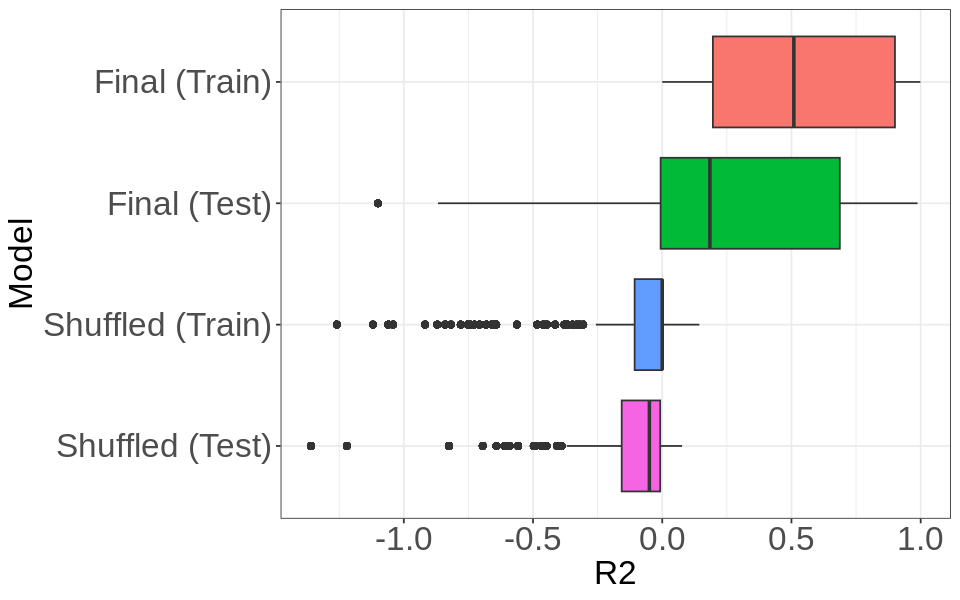

In [23]:
# df_stats factor levels
df_stats$shuffle_plus_data_split <- factor(
    df_stats$shuffle_plus_data_split,
    levels = c(
        "Shuffled (Test)",
        "Shuffled (Train)",
        "Final (Test)",
        "Final (Train)"
    )
)
width = 8
height = 5
options(repr.plot.width=width, repr.plot.height=height)
r2_boxplot <- (
    ggplot(df_stats, aes(x=r2, y=shuffle_plus_data_split, fill=shuffle_plus_data_split)) 
        + geom_boxplot()
        + figure_theme
        + ylab("Model")
        + xlab("R2")
        # change legend labels
        + labs(fill = "Model", hjust=0.5)
        # change legend title size
        + figure_theme
        # remove legend 
        + theme(legend.position="none")
        # change color of the boxplot
        + scale_fill_manual(values=c(
            default_colors[4],
            default_colors[3],
            default_colors[2],
            default_colors[1]
        ))

)
r2_boxplot

## Coefficient Plots

In [17]:
# path set
input_file_path <- file.path(paste0("../../../6.bulk_Morphology_Elastic_Network/3.model_coefficients/results/regression/",cell_type))
# read in the data
output_path <- file.path(paste0("../figures/","regression/",cell_type,"/"))
# create output directory if it doesn't exist
dir.create(output_path, recursive = TRUE, showWarnings = FALSE)


In [18]:
## function to process the data for visualization
process_subset_data <- function(df){
    # read in the data
    # data <- read.csv(data_path, header = TRUE, sep = ",", stringsAsFactors = FALSE)
    # get the basename of the files

    data <- df %>%
        dplyr::arrange(desc(abs(coefficients))) %>%
        tidyr::separate(
            feature_names,
            into = c(
                "compartment",
                "feature_group",
                "measurement",
                "channel", 
                "parameter1", 
                "parameter2"
            ),
            sep = "_",
            remove = FALSE
        ) %>%
        dplyr::mutate(channel_cleaned = channel) %>%
        dplyr::arrange(desc(abs(coefficients)))

    # Clean channel for visualization
    data$channel_learned <- dplyr::recode(data$channel,
            "CorrDNA" = "nuclei",
            "CorrMito" = "Mito",
            "CorrER" = "ER",
            "CorrGasdermin" = "gasdermin",
            "CorrPM" = "PM",
            .default = "other",
            .missing="other"
    )
    data <- data %>%
        dplyr::group_by(feature_group, channel_learned, compartment) %>%
        dplyr::slice_max(order_by = coefficients, n = 1)
    return(data)
}


In [19]:
plot_coeffs <- function(df, cytokine, shuffle){

# plot the data
coef_gg <- (
    ggplot(df, aes(x = channel_learned, y = feature_group))
    + geom_point(aes(fill = abs(coefficients)), pch = 22, size = 5.75)
    + facet_wrap("~compartment", ncol = 3)
    + theme_bw()
    + scale_fill_continuous(
        name="Top Abs. val\ntreatment\nlinear model\ncoefficient",
        low = "darkblue",
        high = "yellow",
    )
    + xlab("Channel")
    + ylab("Feature")
    
    + figure_theme
    + theme(
        axis.text.x = element_text(angle = 45, hjust = 1, size = 14),
    )
    # rotate x axis labels
    + theme(axis.text.x = element_text(angle = 45, hjust = 1))
    + ggtitle(paste0("Top Abs. val treatment ElasticNet coefficients for \n",cytokine,shuffle," model"))
    + theme(plot.title = element_text(hjust = 0.5))
    )
    return(coef_gg)
}


In [20]:
# get all files in a directory
files <- list.files(path = input_file_path, pattern = "*.csv", full.names = TRUE)

# create empty list (mimics a dictionary )
nested_list <- list(
        filename = list(),
        cytokine = list(),
        shuffle = list()
    )

for (i in files){
    filename <- basename(i)
    # split the string at the first _
    filename <- strsplit(filename, "_", fixed = TRUE)[[1]]
    cytokine <- filename[1]
    shuffle <- filename[2]
    nested_list$filename <- c(nested_list$filename, i)
    nested_list$cytokine <- c(nested_list$cytokine, cytokine)
    nested_list$shuffle <- c(nested_list$shuffle, shuffle)
}


In [21]:
cytokine <- 'IL-1 beta [NSU]'
shuffle <- 'final'
filename <- nested_list$filename[which(nested_list$cytokine == cytokine & nested_list$shuffle == shuffle)]
# set to string
filename <- filename[[1]]

il1beta_final <- read.csv(filename, header = TRUE, sep = ",", stringsAsFactors = FALSE)


Warning message:
“Expected 6 pieces. Additional pieces discarded in 265 rows [20, 23, 26, 27, 31,
39, 40, 46, 47, 48, 50, 57, 58, 59, 61, 63, 66, 73, 75, 77, ...].”
Warning message:
“Expected 6 pieces. Missing pieces filled with `NA` in 329 rows [1, 2, 3, 4, 5,
6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 22, 24, ...].”


feature_names,compartment,feature_group,measurement,channel,parameter1,parameter2,coefficients,secreted_proteins,shuffle,cell_type,alpha,l1_ratio,r2,channel_cleaned,channel_learned
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
Cells_AreaShape_Eccentricity,Cells,AreaShape,Eccentricity,NA,NA,NA,0.06612534,IL-1 beta [NSU],final,PBMC,0.001,0.01,0.9874566,NA,other
Cytoplasm_AreaShape_Zernike_6_4,Cytoplasm,AreaShape,Zernike,6,4,NA,0.05743271,IL-1 beta [NSU],final,PBMC,0.001,0.01,0.9874566,6,other
Nuclei_AreaShape_Zernike_2_2,Nuclei,AreaShape,Zernike,2,2,NA,0.09939969,IL-1 beta [NSU],final,PBMC,0.001,0.01,0.9874566,2,other
Cells_Correlation_Overlap_CorrER_CorrGasdermin,Cells,Correlation,Overlap,CorrER,CorrGasdermin,NA,0.06422683,IL-1 beta [NSU],final,PBMC,0.001,0.01,0.9874566,CorrER,ER
Cytoplasm_Correlation_RWC_CorrER_CorrGasdermin,Cytoplasm,Correlation,RWC,CorrER,CorrGasdermin,NA,0.12053608,IL-1 beta [NSU],final,PBMC,0.001,0.01,0.9874566,CorrER,ER
Nuclei_Correlation_Overlap_CorrER_CorrGasdermin,Nuclei,Correlation,Overlap,CorrER,CorrGasdermin,NA,0.11657858,IL-1 beta [NSU],final,PBMC,0.001,0.01,0.9874566,CorrER,ER


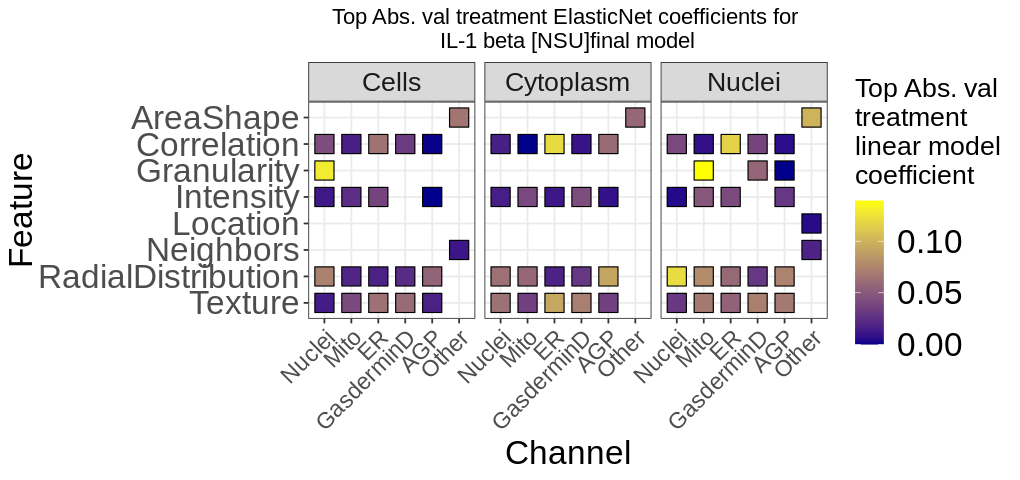

In [22]:
il1beta_final <- process_subset_data(il1beta_final)
head(il1beta_final)
# factor levels
# rename the factor levels
il1beta_final$channel_learned <- factor(
    il1beta_final$channel_learned,
    levels = c(
        "nuclei",
        "Mito",
        "ER",
        "gasdermin",
        "PM",
        "other"
    ),
    labels = c(
        "Nuclei",
        "Mito",
        "ER",
        "GasderminD",
        "AGP",
        "Other"
    )
)
il1beta_final$feature_group <- factor(
    il1beta_final$feature_group,
    levels = c(
        "AreaShape",
        "Correlation",
        "Granularity",
        "Intensity",
        "Location",
        "Neighbors",
        "RadialDistribution",
        "Texture"
    )
)
# reverese the order of the factor levels
il1beta_final$feature_group <- factor(
    il1beta_final$feature_group,
    levels = rev(levels(il1beta_final$feature_group))
)

il1beta_final_plot <- plot_coeffs(il1beta_final, cytokine, shuffle)
# output
coef_gg_file <- file.path(paste0(output_path,"/","top_abs_val_coefficients_enet.pdf"))
# set plot size
width <- 8.5
height <- 4
options(repr.plot.width=width, repr.plot.height=height)
ggsave(coef_gg_file, il1beta_final_plot, width=width, height=height, dpi=500)
il1beta_final_plot


### Heatmap of Coefficients

In [23]:
# set cell type
cell_type <- "PBMC"


In [24]:
# set path for data of all models
data_path <- file.path(paste0("../../../6.bulk_Morphology_Elastic_Network/4.model_performance/results/regression/", cell_type, "/", "all_model_performance.csv"))
df <- read.csv(data_path)
# setfigure path
figure_path <- file.path(paste0("../figures/regression/", cell_type, "/"))
# make the directory if it doesn't exist
dir.create(figure_path, recursive = TRUE, showWarnings = FALSE)


In [25]:
# fix the col name
df <- df %>% 
  mutate(secreted_proteins = case_when(
    secreted_proteins == "MMP-1 [NSU]" ~ "MMP-1",
    secreted_proteins == "VEGFR-1 [NSU]" ~ "VEGFR-1",
    secreted_proteins == "CCL4 [NSU]" ~ "CCL4",
    secreted_proteins == "MMP-12 [NSU]" ~ "MMP-12",
    secreted_proteins == "CCL18 [NSU]" ~ "CCL18",
    secreted_proteins == "IL-9 [NSU]" ~ "IL-9",
    secreted_proteins == "TWEAK [NSU]" ~ "TWEAK",
    secreted_proteins == "EGFR [NSU]" ~ "EGFR",
    secreted_proteins == "IL-21 [NSU]" ~ "IL-21",
    secreted_proteins == "FGF-1 [NSU]" ~ "FGF-1",
    secreted_proteins == "FAS-L [NSU]" ~ "FAS-L",
    secreted_proteins == "CXCL12 (beta) [NSU]" ~ "CXCL12 (beta)",
    secreted_proteins == "CXCL12 (alpha) [NSU]" ~ "CXCL12 (alpha)",
    secreted_proteins == "CXCL14 [NSU]" ~ "CXCL14",
    secreted_proteins == "HGF [NSU]" ~ "HGF",
    secreted_proteins == "IL-3 [NSU]" ~ "IL-3",
    secreted_proteins == "CXCL7 [NSU]" ~ "CXCL7",
    secreted_proteins == "CCL25 [NSU]" ~ "CCL25",
    secreted_proteins == "BMP9 [NSU]" ~ "BMP9",
    secreted_proteins == "IL-12 p35 [NSU]" ~ "IL-12 p35",
    secreted_proteins == "CCL16 [NSU]" ~ "CCL16",
    secreted_proteins == "CCL2 [NSU]" ~ "CCL2",
    secreted_proteins == "LIF [NSU]" ~ "LIF",
    secreted_proteins == "CXCL9 [NSU]" ~ "CXCL9",
    secreted_proteins == "CNTF [NSU]" ~ "CNTF",
    secreted_proteins == "TSLP [NSU]" ~ "TSLP",
    secreted_proteins == "Flt-3 Ligand [NSU]" ~ "Flt-3 Ligand",
    secreted_proteins == "CD14 [NSU]" ~ "CD14",
    secreted_proteins == "IL-16 [NSU]" ~ "IL-16",
    secreted_proteins == "FGF-21 [NSU]" ~ "FGF-21",
    secreted_proteins == "IL-29 [NSU]" ~ "IL-29",
    secreted_proteins == "IL-17C [NSU]" ~ "IL-17C",
    secreted_proteins == "IFN-epsilon [NSU]" ~ "IFN-epsilon",
    secreted_proteins == "PCSK9 [NSU]" ~ "PCSK9",
    secreted_proteins == "TPO (Thrombopoietin) [NSU]" ~ "Thrombopoietin",
    secreted_proteins == "TREM2 [NSU]" ~ "TREM2",
    secreted_proteins == "Growth Hormone (Somatotropin) [NSU]" ~ "Somatotropin",
    secreted_proteins == "CCL1 [NSU]" ~ "CCL1",
    secreted_proteins == "LOX1 (OLR1) [NSU]" ~ "LOX1 (OLR1)",
    secreted_proteins == "MMP-3 [NSU]" ~ "MMP-3",
    secreted_proteins == "IL-32 (alpha) [NSU]" ~ "IL-32 (alpha)",
    secreted_proteins == "IL-7 [NSU]" ~ "IL-7",
    secreted_proteins == "CCL21 [NSU]" ~ "CCL21",
    secreted_proteins == "CD276 (B7-H3) [NSU]" ~ "CD276 (B7-H3)",
    secreted_proteins == "IL-2 RA [NSU]" ~ "IL-2 RA",
    secreted_proteins == "Calbindin [NSU]" ~ "Calbindin",
    secreted_proteins == "CCL3 [NSU]" ~ "CCL3",
    secreted_proteins == "ICAM-1 [NSU]" ~ "ICAM-1",
    secreted_proteins == "IL-17A [NSU]" ~ "IL-17A",
    secreted_proteins == "CCL28 [NSU]" ~ "CCL28",
    secreted_proteins == "TIMP1 [NSU]" ~ "TIMP1",
    secreted_proteins == "GDF-15 (MIC-1) [NSU]" ~ "GDF-15 (MIC-1)",
    secreted_proteins == "CXCL17 [NSU]" ~ "CXCL17",
    secreted_proteins == "M-CSF R (CD115) [NSU]" ~ "M-CSF R (CD115)",
    secreted_proteins == "CCL7 [NSU]" ~ "CCL7",
    secreted_proteins == "Granzyme B [NSU]" ~ "Granzyme B",
    secreted_proteins == "CXCL4 [NSU]" ~ "CXCL4",
    secreted_proteins == "PDGF-BB [NSU]" ~ "PDGF-BB",
    secreted_proteins == "CX3CL1 [NSU]" ~ "CX3CL1",
    secreted_proteins == "FGF-6 [NSU]" ~ "FGF-6",
    secreted_proteins == "IL-35 [NSU]" ~ "IL-35",
    secreted_proteins == "MMP-7 [NSU]" ~ "MMP-7",
    secreted_proteins == "GM-CSF [NSU]" ~ "GM-CSF",
    secreted_proteins == "CCL24 [NSU]" ~ "CCL24",
    secreted_proteins == "IL-12 p40 [NSU]" ~ "IL-12 p40",
    secreted_proteins == "IL-5 [NSU]" ~ "IL-5",
    secreted_proteins == "BCMA (TNFRSF17) [NSU]" ~ "BCMA (TNFRSF17)",
    secreted_proteins == "Tissue Factor (TF) [NSU]" ~ "Tissue Factor",
    secreted_proteins == "IL-1 beta [NSU]" ~ "IL-1 beta",
    secreted_proteins == "CD30 [NSU]" ~ "CD30",
    secreted_proteins == "CCL27 [NSU]" ~ "CCL27",
    secreted_proteins == "ICAM-2 [NSU]" ~ "ICAM-2",
    secreted_proteins == "CXCL16 [NSU]" ~ "CXCL16",
    secreted_proteins == "VEGF-A (165) [NSU]" ~ "VEGF-A (165)",
    secreted_proteins == "IL-2 [NSU]" ~ "IL-2",
    secreted_proteins == "HVEM [NSU]" ~ "HVEM",
    secreted_proteins == "PTX3 (Pentraxin 3) [NSU]" ~ "PTX3",
    secreted_proteins == "IL-1 alpha [NSU]" ~ "IL-1 alpha",
    secreted_proteins == "CXCL3 [NSU]" ~ "CXCL3",
    secreted_proteins == "Oncostatin M (OSM) [NSU]" ~ "Oncostatin M",
    secreted_proteins == "CCL8 [NSU]" ~ "CCL8",
    secreted_proteins == "CCL15 [NSU]" ~ "CCL15",
    secreted_proteins == "FLRG (FSTL3) [NSU]" ~ "FLRG",
    secreted_proteins == "CXCL5 [NSU]" ~ "CXCL5",
    secreted_proteins == "CD163 [NSU]" ~ "CD163",
    secreted_proteins == "IL-17E (IL-25) [NSU]" ~ "IL-17E",
    secreted_proteins == "NF-L [NSU]" ~ "NF-L",
    secreted_proteins == "IFN alpha 2 (alpha 2b) [NSU]" ~ "IFN alpha 2",
    secreted_proteins == "TNF RI [NSU]" ~ "TNF RI",
    secreted_proteins == "CD40L [NSU]" ~ "CD40L",
    secreted_proteins == "IFN beta [NSU]" ~ "IFN beta",
    secreted_proteins == "VEGF Receptor 2 (Flk-1) [NSU]" ~ "VEGF Receptor 2",
    secreted_proteins == "BDNF [NSU]" ~ "BDNF",
    secreted_proteins == "Amyloid beta [NSU]" ~ "Amyloid beta",
    secreted_proteins == "MMP-2 [NSU]" ~ "MMP-2",
    secreted_proteins == "SAA [NSU]" ~ "SAA",
    secreted_proteins == "uPA [NSU]" ~ "uPA",
    secreted_proteins == "IL-22 BP [NSU]" ~ "IL-22 BP",
    secreted_proteins == "TRAIL [NSU]" ~ "TRAIL",
    secreted_proteins == "Mesothelin [NSU]" ~ "Mesothelin",
    secreted_proteins == "Activin A [NSU]" ~ "Activin A",
    secreted_proteins == "MMP-9 [NSU]" ~ "MMP-9",
    secreted_proteins == "CCL13 [NSU]" ~ "CCL13",
    secreted_proteins == "CXCL11 [NSU]" ~ "CXCL11",
    secreted_proteins == "IL-31 [NSU]" ~ "IL-31",
    secreted_proteins == "MIF [NSU]" ~ "MIF",
    secreted_proteins == "BMP7 [NSU]" ~ "BMP7",
    secreted_proteins == "IL-12 p70 [NSU]" ~ "IL-12 p70",
    secreted_proteins == "CCL19 [NSU]" ~ "CCL19",
    secreted_proteins == "CCL5 [NSU]" ~ "CCL5",
    secreted_proteins == "IL-33 [NSU]" ~ "IL-33",
    secreted_proteins == "IL-22 [NSU]" ~ "IL-22",
    secreted_proteins == "CCL11 [NSU]" ~ "CCL11",
    secreted_proteins == "IL-8 [NSU]" ~ "IL-8",
    secreted_proteins == "SCF [NSU]" ~ "SCF",
    secreted_proteins == "TNF RII [NSU]" ~ "TNF RII",
    secreted_proteins == "FGF-2 [NSU]" ~ "FGF-2",
    secreted_proteins == "Leptin [NSU]" ~ "Leptin",
    secreted_proteins == "CXCL13 [NSU]" ~ "CXCL13",
    secreted_proteins == "TNF alpha [NSU]" ~ "TNF alpha",
    secreted_proteins == "IL-4 [NSU]" ~ "IL-4",
    secreted_proteins == "CCL23 [NSU]" ~ "CCL23",
    secreted_proteins == "IGF-1 [NSU]" ~ "IGF-1",
    secreted_proteins == "FGF-4 [NSU]" ~ "FGF-4",
    secreted_proteins == "GDF-11 (BMP-11) [NSU]" ~ "GDF-11 (BMP-11)",
    secreted_proteins == "IL-10 [NSU]" ~ "IL-10",
    secreted_proteins == "IL-23 [NSU]" ~ "IL-23",
    secreted_proteins == "TNF RIII (Lymphotoxin Beta R) [NSU]" ~ "TNF RIII",
    secreted_proteins == "IL-17B [NSU]" ~ "IL-17B",
    secreted_proteins == "ST2 (IL-33R) [NSU]" ~ "ST2 (IL-33R)",
    secreted_proteins == "PLGF [NSU]" ~ "PLGF",
    secreted_proteins == "VEGF-D [NSU]" ~ "VEGF-D",
    secreted_proteins == "XCL1 (Lymphotactin) [NSU]" ~ "XCL1",
    secreted_proteins == "GDNF [NSU]" ~ "GDNF",
    secreted_proteins == "C5 [NSU]" ~ "C5",
    secreted_proteins == "IL-1 RA" ~ "IL-1 RA",
    secreted_proteins == "IL-17D [NSU]" ~ "IL-17D",
    secreted_proteins == "IL-27 [NSU]" ~ "IL-27",
    secreted_proteins == "Osteopontin (OPN) [NSU]" ~ "Osteopontin",
    secreted_proteins == "FGF-9 [NSU]" ~ "FGF-9",
    secreted_proteins == "BAFF [NSU]" ~ "BAFF",
    secreted_proteins == "TGF-beta 3 [NSU]" ~ "TGF-beta 3",
    secreted_proteins == "EGF [NSU]" ~ "EGF",
    secreted_proteins == "IL-5 [NSU]" ~ "IL-5",
    secreted_proteins == "FGF-7 (KGF) [NSU]" ~ "FGF-7 (KGF)",
    secreted_proteins == "APRIL [NSU]" ~ "APRIL",
    secreted_proteins == "WISP-1 (CCN4) [NSU]" ~ "WISP-1 (CCN4)",
    secreted_proteins == "CCL22 [NSU]" ~ "CCL22",
    secreted_proteins == "FGF-19 [NSU]" ~ "FGF-19",
    secreted_proteins == "M-CSF [NSU]" ~ "M-CSF",
    secreted_proteins == "CXCL10 [NSU]" ~ "CXCL10",
    secreted_proteins == "TGF-beta 1 (total) [NSU]" ~ "TGF-beta 1 ",
    secreted_proteins == "Tie-2 [NSU]" ~ "Tie-2",
    secreted_proteins == "TGF-beta 1 (LAP domain in precursor) [NSU]" ~ "TGF-beta 1",
    secreted_proteins == "FGFR3 (IIIc) [NSU]" ~ "FGFR3 (IIIc)",
    secreted_proteins == "AITRL (GITR Ligand) [NSU]" ~ "AITRL (GITR Ligand)",
    secreted_proteins == "Amphiregulin [NSU]" ~ "Amphiregulin",
    secreted_proteins == "BMP4 [NSU]" ~ "BMP4",
    secreted_proteins == "G-CSF [NSU]" ~ "G-CSF",
    secreted_proteins == "TGF-beta 2 [NSU]" ~ "TGF-beta 2",
    secreted_proteins == "IL-6 R alpha [NSU]" ~ "IL-6 R alpha",
    secreted_proteins == "BMP6 [NSU]" ~ "BMP6",
    secreted_proteins == "NGF beta [NSU]" ~ "NGF beta",
    secreted_proteins == "IL-1 R1 [NSU]" ~ "IL-1 R1",
    secreted_proteins == "MMP-10 [NSU]" ~ "MMP-10",
    secreted_proteins == "IL-17F [NSU]" ~ "IL-17F",
    secreted_proteins == "IL-18 [NSU]" ~ "IL-18",
    secreted_proteins == "CXCL6 [NSU]" ~ "CXCL6",
    secreted_proteins == "IL-6 [NSU]" ~ "IL-6",
    secreted_proteins == "CXCL1 [NSU]" ~ "CXCL1",
    secreted_proteins == "VEGF-C [NSU]" ~ "VEGF-C",
    secreted_proteins == "Resistin [NSU]" ~ "Resistin",
    secreted_proteins == "EMMPRIN [NSU]" ~ "EMMPRIN",
    secreted_proteins == "IFN gamma [NSU]" ~ "IFN gamma",
    secreted_proteins == "CCL20 [NSU]" ~ "CCL20",
    secreted_proteins == "CRP [NSU]" ~ "CRP",
    secreted_proteins == "VCAM-1 [NSU]" ~ "VCAM-1",
    secreted_proteins == "Cytochrome C [NSU]" ~ "Cytochrome C",
    secreted_proteins == "BMP3 [NSU]" ~ "BMP3",
    secreted_proteins == "IL-24 [NSU]" ~ "IL-24",
    secreted_proteins == "IL-28A [NSU]" ~ "IL-28A",
    secreted_proteins == "CCL17 [NSU]" ~ "CCL17",
    secreted_proteins == "BMP2 [NSU]" ~ "BMP2",
    secreted_proteins == "CD27L [NSU]" ~ "CD27L",
    secreted_proteins == "NRG1 beta 1 [NSU]" ~ "NRG1 beta 1",
    secreted_proteins == "IL-11 [NSU]" ~ "IL-11",
    TRUE ~ secreted_proteins
  ))


In [26]:
# select MMP-1 secreted protein as the target
df <- df %>% filter(shuffle == "final")


In [27]:
# select rows that have r2 > 0.5
df <- df %>% filter(r2 > 0.5)
# filter rows that have coeff = 0
df <- df %>% filter(coefficients != 0)


In [28]:
# get the feature names for color bar visualization 
features <- df %>% select(feature_names)
# drop duplicate features from the feature names
features <- unique(features)
features <- features %>%
        tidyr::separate(
            feature_names,
            into = c(
                "compartment",
                "feature_group",
                "measurement",
                "channel", 
                "parameter1", 
                "parameter2"
            ),
            sep = "_",
            remove = FALSE
        ) %>%
        dplyr::mutate(channel_cleaned = channel)

    # Clean channel for visualization
    features$channel_learned <- dplyr::recode(features$channel,
            "CorrDNA" = "Nuclei",
            "CorrMito" = "Mito",
            "CorrER" = "ER",
            "CorrGasdermin" = "GasderminD",
            "CorrPM" = "AGP",
            .default = "Other",
            .missing="Other"
    )
# make the channel learned a factor
features$channel_learned <- factor(features$channel_learned, levels = c("Nuclei", "Mito", "ER", "Gasdermin", "AGP", "Other"))


Warning message:
“Expected 6 pieces. Additional pieces discarded in 265 rows [5, 47, 55, 69, 70,
71, 74, 78, 81, 82, 85, 91, 94, 97, 98, 99, 100, 102, 105, 106, ...].”
Warning message:
“Expected 6 pieces. Missing pieces filled with `NA` in 329 rows [1, 2, 3, 4, 6,
7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 21, 22, 23, 24, ...].”


In [29]:
r2_df <- df %>% select(r2)
r2_df <- unique(r2_df)
column_ha <- HeatmapAnnotation(
    df = r2_df,
    show_legend = TRUE,
    annotation_name_side = "left",
    # rotate the title
    annotation_legend_param = list(
        title_gp = gpar(fontsize = 16, angle = 0),
        labels_gp = gpar(fontsize = 16, angle = 0),
        title_position = "topcenter",
        title_gp = gpar(fontsize = 16, angle = 0)
    ),
    annotation_name_gp = gpar(fontsize = 16),
    # set color bar for r2 continuous value with brewer palette
    col = list(r2 = colorRamp2(c(0, 0.5, 1), spectral_palette <- c(
        # white
        "#FFFFFF",
        # light blue
        "#A6CEE3",
        # dark blue
        "#1F78B4"
    )))

)                   


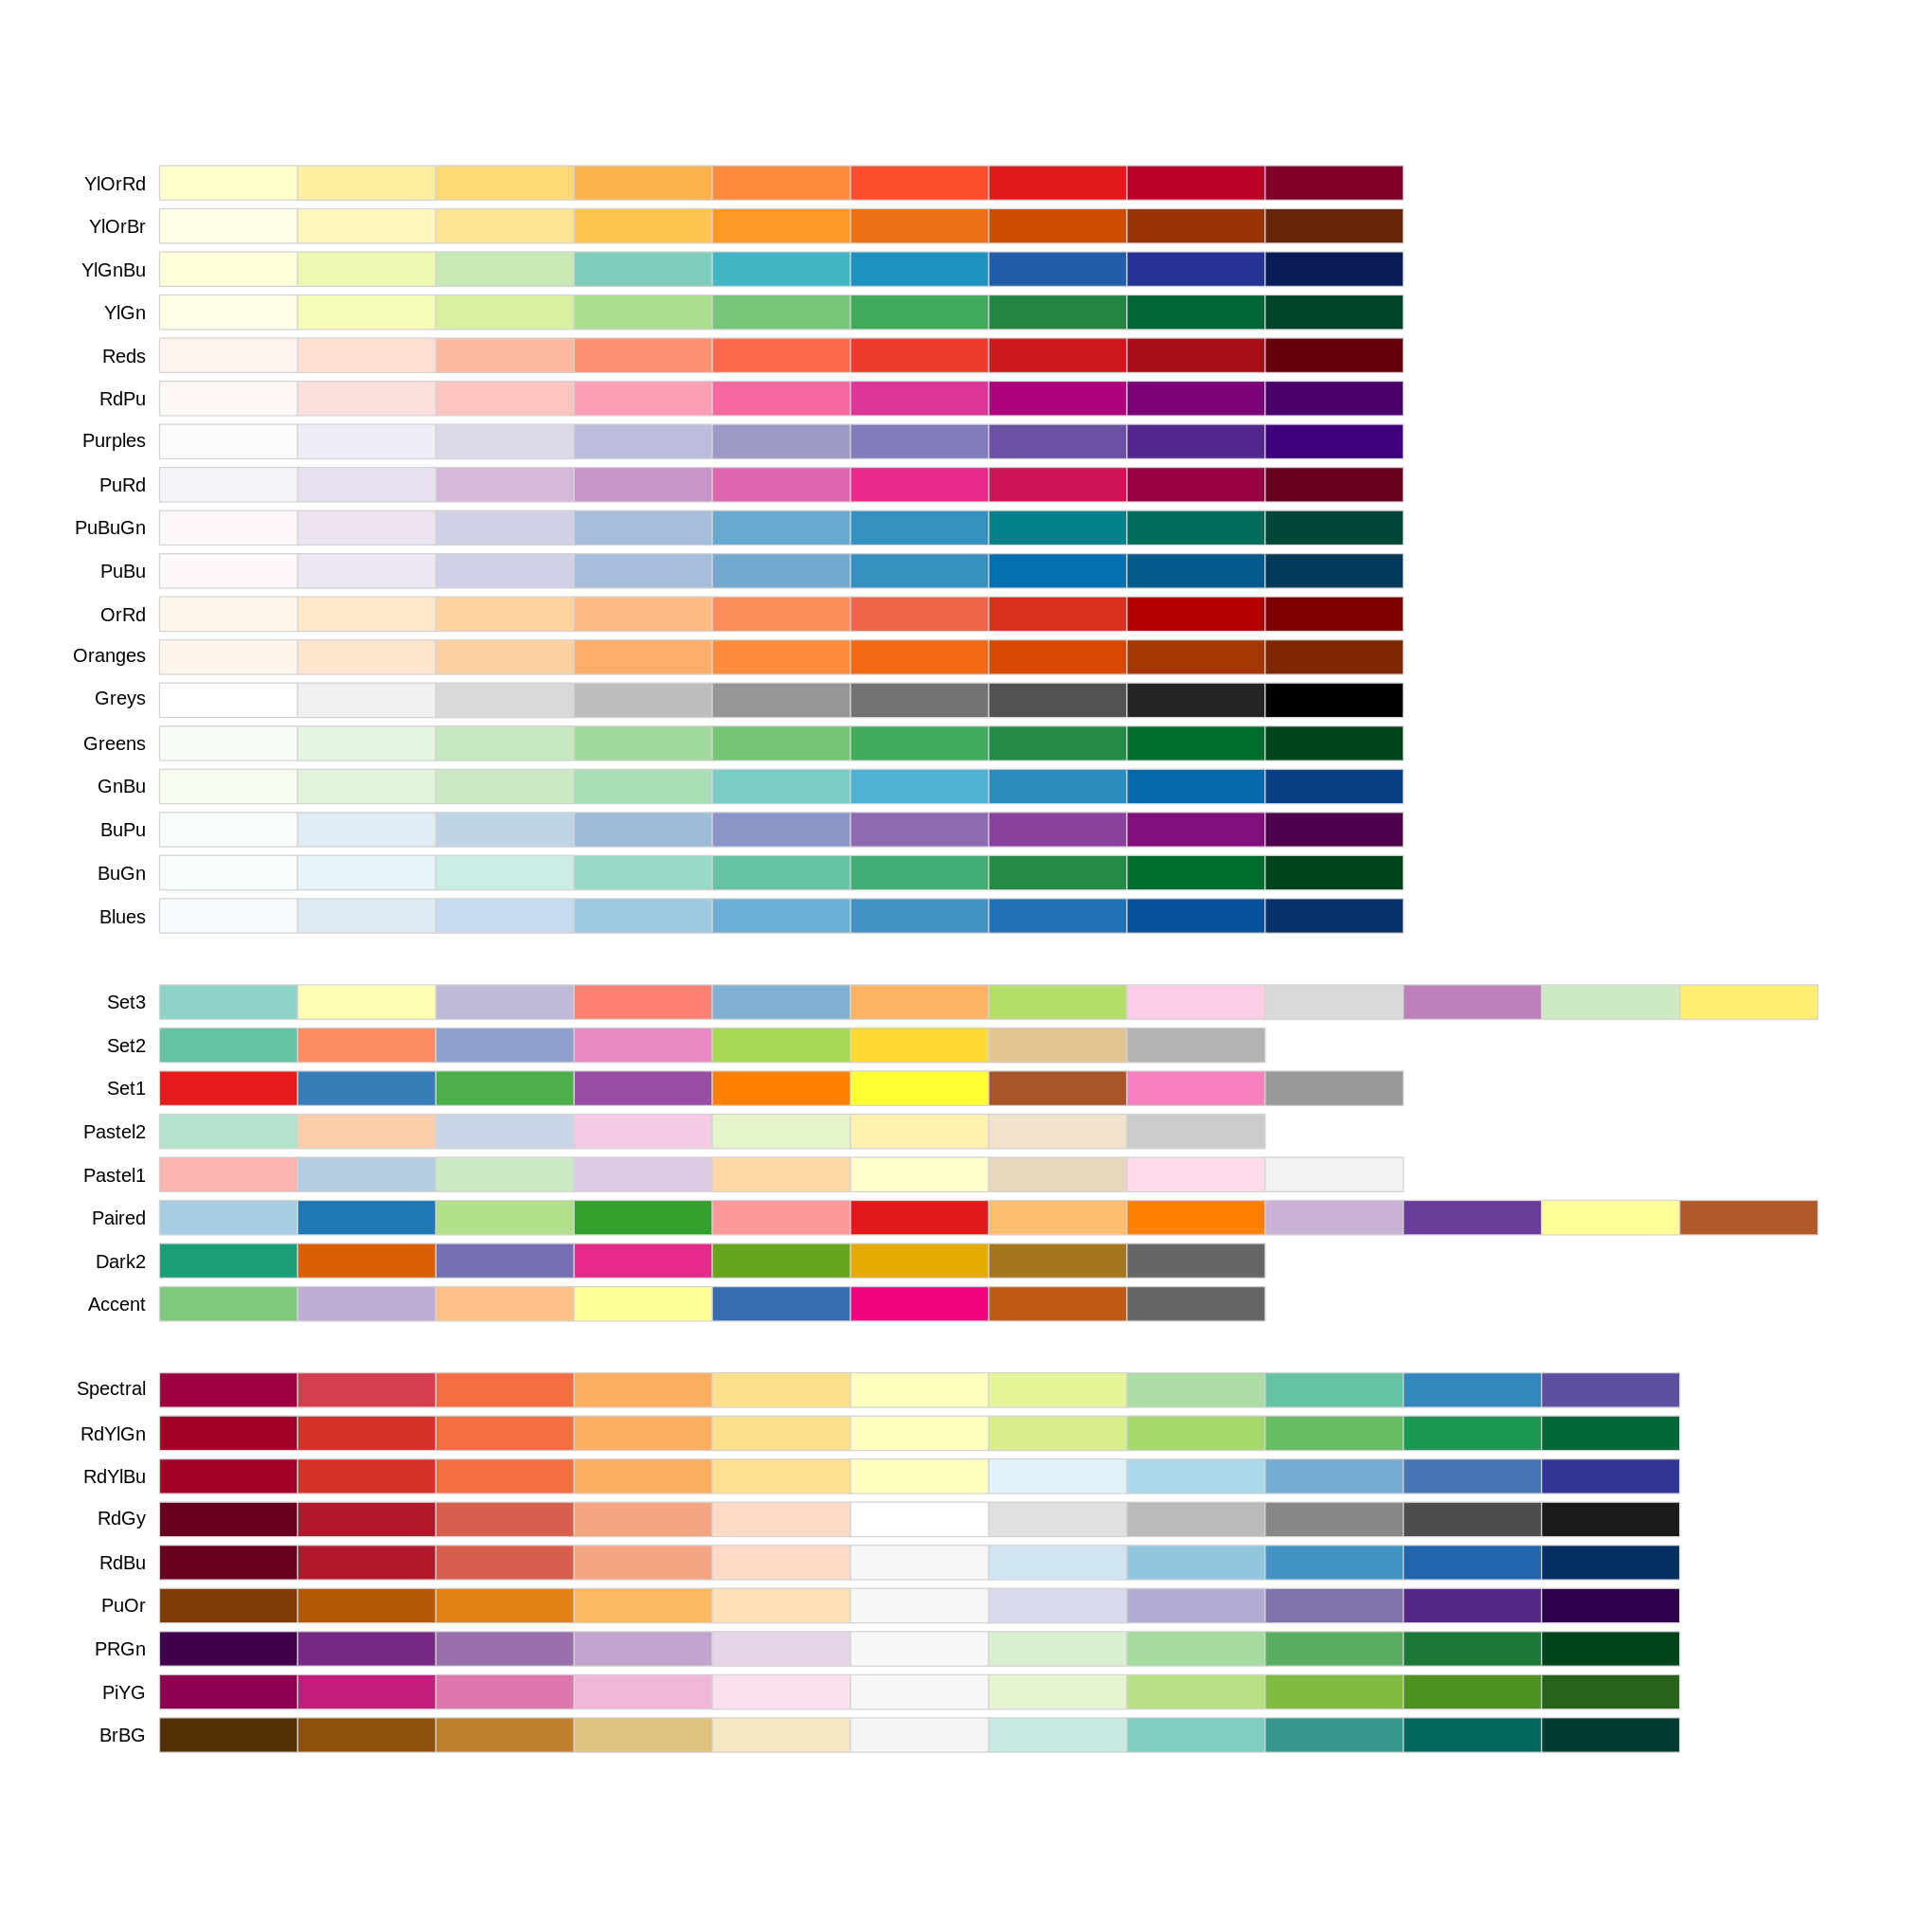

In [36]:
# show brewer palette plot
display.brewer.all()

In [42]:
# make the df into a matrix for heatmap
mat <- dcast(df, feature_names ~ secreted_proteins, value.var = "coefficients")
row.names(mat) <- mat$feature_names
mat <- mat %>% select(-feature_names)
mat <- as.matrix(mat)
# na to 0
mat[is.na(mat)] <- 0
# drop rows that have 0 in 50% of the columns
mat <- mat[rowSums(mat != 0) > ncol(mat)/2, ]
mat <- as.data.frame(mat)
# get the feature names from the index
mat$feature_names <- row.names(mat)
# get the feature names for color bar visualization
features <- mat %>% select(feature_names)
# drop duplicate features from the feature names
features <- unique(features)
features <- features %>%
        tidyr::separate(
            feature_names,
            into = c(
                "compartment",
                "feature_group",
                "measurement",
                "channel", 
                "parameter1", 
                "parameter2"
            ),
            sep = "_",
            remove = FALSE
        ) %>%
        dplyr::mutate(channel_cleaned = channel)

    # Clean channel for visualization
    features$channel_learned <- dplyr::recode(features$channel,
            "CorrDNA" = "Nuclei",
            "CorrMito" = "Mito",
            "CorrER" = "ER",
            "CorrGasdermin" = "GasderminD",
            "CorrPM" = "AGP",
            .default = "Other",
            .missing="Other"
    )

# set annotations
row_ha_1 <- rowAnnotation(
    Compartment = features$compartment,
    show_legend = TRUE,
    # change the legend titles
    annotation_legend_param = list(
        title_position = "topcenter", 
        title_gp = gpar(fontsize = 16, angle = 0), 
        labels_gp = gpar(fontsize = 16, 
        title = gpar(fontsize = 16))),
    annotation_name_side = "bottom",
    annotation_name_gp = gpar(fontsize = 16),
    # color
    col = list(
        Compartment = c(
            "Cells" = brewer.pal(12, "Accent")[7], 
            "Cytoplasm" = brewer.pal(12, "Accent")[6], 
            "Nuclei" = "#0000AB"
        )


    )
)

row_ha_2 <- rowAnnotation(
        FeatureType = features$feature_group, 
       annotation_legend_param = list(
        title_position = "topcenter", 
        title_gp = gpar(fontsize = 16, angle = 0), 
        labels_gp = gpar(fontsize = 16, 
        title = gpar(fontsize = 16))),
    annotation_name_side = "bottom",
    annotation_name_gp = gpar(fontsize = 16),
    col = list(
            Feature_Type = c(
            "AreaShape" = brewer.pal(8, "Dark2")[1],
            "Correlation" = brewer.pal(8, "Dark2")[2],
            "Granularity" = brewer.pal(8, "Dark2")[3],
            "Neighbors" =  brewer.pal(8, "Dark2")[4],
            "RadialDistribution" = brewer.pal(8, "Dark2")[5],
            "Texture" = brewer.pal(8, "Dark2")[6]
        )
    )
)

row_ha_3 <- rowAnnotation(
    Channel = features$channel_learned, 
    annotation_legend_param = list(
        title_position = "topcenter", 
        title_gp = gpar(fontsize = 16, angle = 0), 
        labels_gp = gpar(fontsize = 16, 
        title = gpar(fontsize = 16),
        # make annotation bar text bigger
        legend = gpar(fontsize = 16),
        annotation_name = gpar(fontsize = 16),
        legend_height = unit(20, "cm"),
        legend_width = unit(1, "cm"),
        # make legend taller
        legend_height = unit(10, "cm"),
        legend_width = unit(1, "cm"),
        legend_key = gpar(fontsize = 16)
        
            )
        ),
    annotation_name_side = "bottom",
    # make font size bigger
    annotation_name_gp = gpar(fontsize = 16),
    col = list(
    Channel = c(
            "Nuclei" = "#0000AB",
            "Mito" = "#B000B0",
            "ER" = "#00D55B",
            "GasderminD" = "#FFFF00",
            "AGP" = "#C90000",
            "Other" = "#B09FB0")
    )
)


# drop the feature names column
mat <- mat %>% select(-feature_names)
mat <- as.matrix(mat)


Warning message:
“Expected 6 pieces. Additional pieces discarded in 3 rows [23, 24, 25].”


Warning message:
“Expected 6 pieces. Missing pieces filled with `NA` in 21 rows [1, 2, 3, 4, 5,
6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, ...].”
Warning message in brewer.pal(12, "Accent"):
“n too large, allowed maximum for palette Accent is 8
Returning the palette you asked for with that many colors
”
Warning message in brewer.pal(12, "Accent"):
“n too large, allowed maximum for palette Accent is 8
Returning the palette you asked for with that many colors
”


In [43]:
# plot size
width <- 40
height <- 10
options(repr.plot.width=width, repr.plot.height=height)
# change margins
# par(mar = c(1, 1, 1, 1))

model_heatmap <- (
        Heatmap(
        mat, 
        cluster_rows = TRUE,    # Cluster rows
        cluster_columns = TRUE, # Cluster columns
        show_row_names = FALSE,  # Show row names
        show_column_names = TRUE, # Show column names
        column_names_gp = gpar(fontsize = 16), # Column name label formatting
        row_names_gp = gpar(fontsize = 14),    # Row name label formatting
        right_annotation = c(row_ha_1,row_ha_2,row_ha_3),
        bottom_annotation = column_ha,
        # rename fill legend
        heatmap_legend_param = list(
                title = "Coefeecient", 
                title_position = "topcenter", 
                title_gp = gpar(fontsize = 16), 
                labels_gp = gpar(fontsize = 16)
                # legend_height = unit(3, "cm"),
                # legend_width = unit(1, "cm")
                ),
        column_dend_height = unit(4, "cm"), 
        row_dend_width = unit(4, "cm"),
        

        )     
)

The automatically generated colors map from the minus and plus 99^th of
the absolute values in the matrix. There are outliers in the matrix
whose patterns might be hidden by this color mapping. You can manually
set the color to `col` argument.

Use `suppressMessages()` to turn off this message.



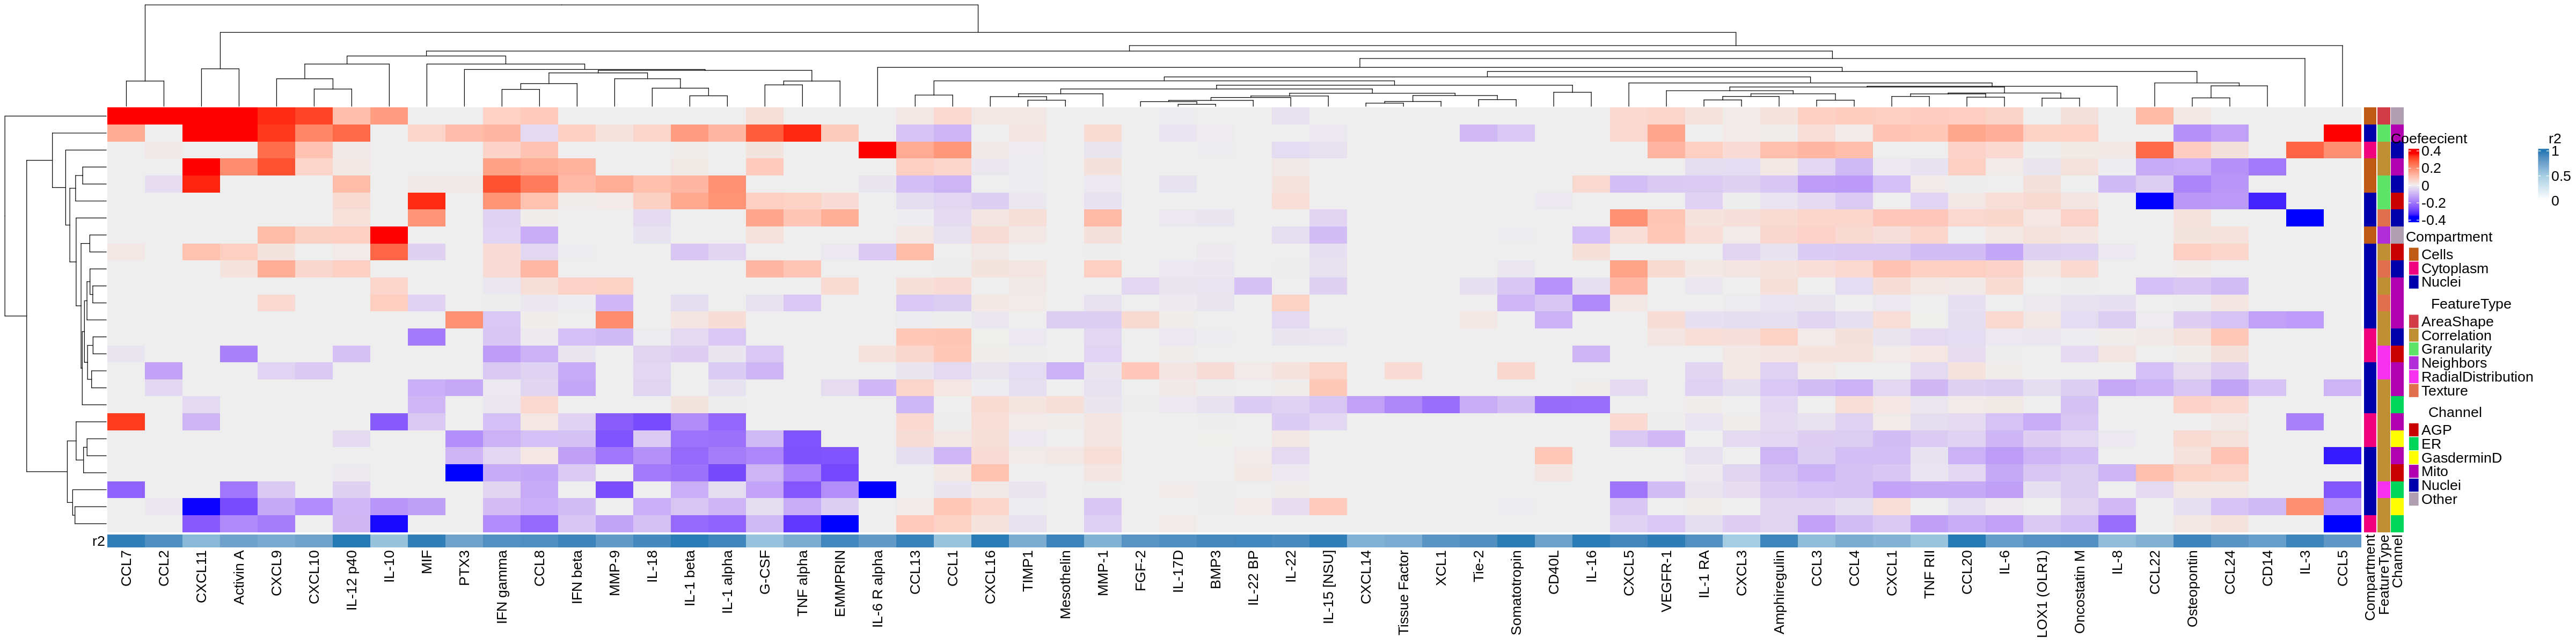

In [44]:
# dont use above line cannot get back into grob object

# ggplotify model_heatmap
model_heatmap <- as.ggplot(model_heatmap)

# # save the figure
ggsave(file = paste0(figure_path, "filtered_features.svg"), plot = model_heatmap, width = width, height = height, units = "in", dpi = 500)
ggsave(file = paste0(figure_path, "filtered_features.png"), plot = model_heatmap, width = width, height = height, units = "in", dpi = 500)
# fix the position of the plot
model_heatmap

In [45]:
# preprocess the figures

# remove all titles on the figures
variance_r2_plot_local <- variance_r2_plot_local + theme(plot.title = element_blank())
IL1beta_a_v_p <- IL1beta_a_v_p + theme(plot.title = element_blank())
model_performance_il1b <- model_performance_il1b + theme(plot.title = element_blank())
il1beta_final_plot <- il1beta_final_plot + theme(plot.title = element_blank())
# model_heatmap <- model_heatmap + theme(plot.title = element_blank())

Warning message:
“Removed 26 rows containing non-finite values (`stat_smooth()`).”


Warning message:
“Removed 26 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 610 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 26 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 26 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 610 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 26 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 26 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 610 rows containing missing values (`geom_point()`).”


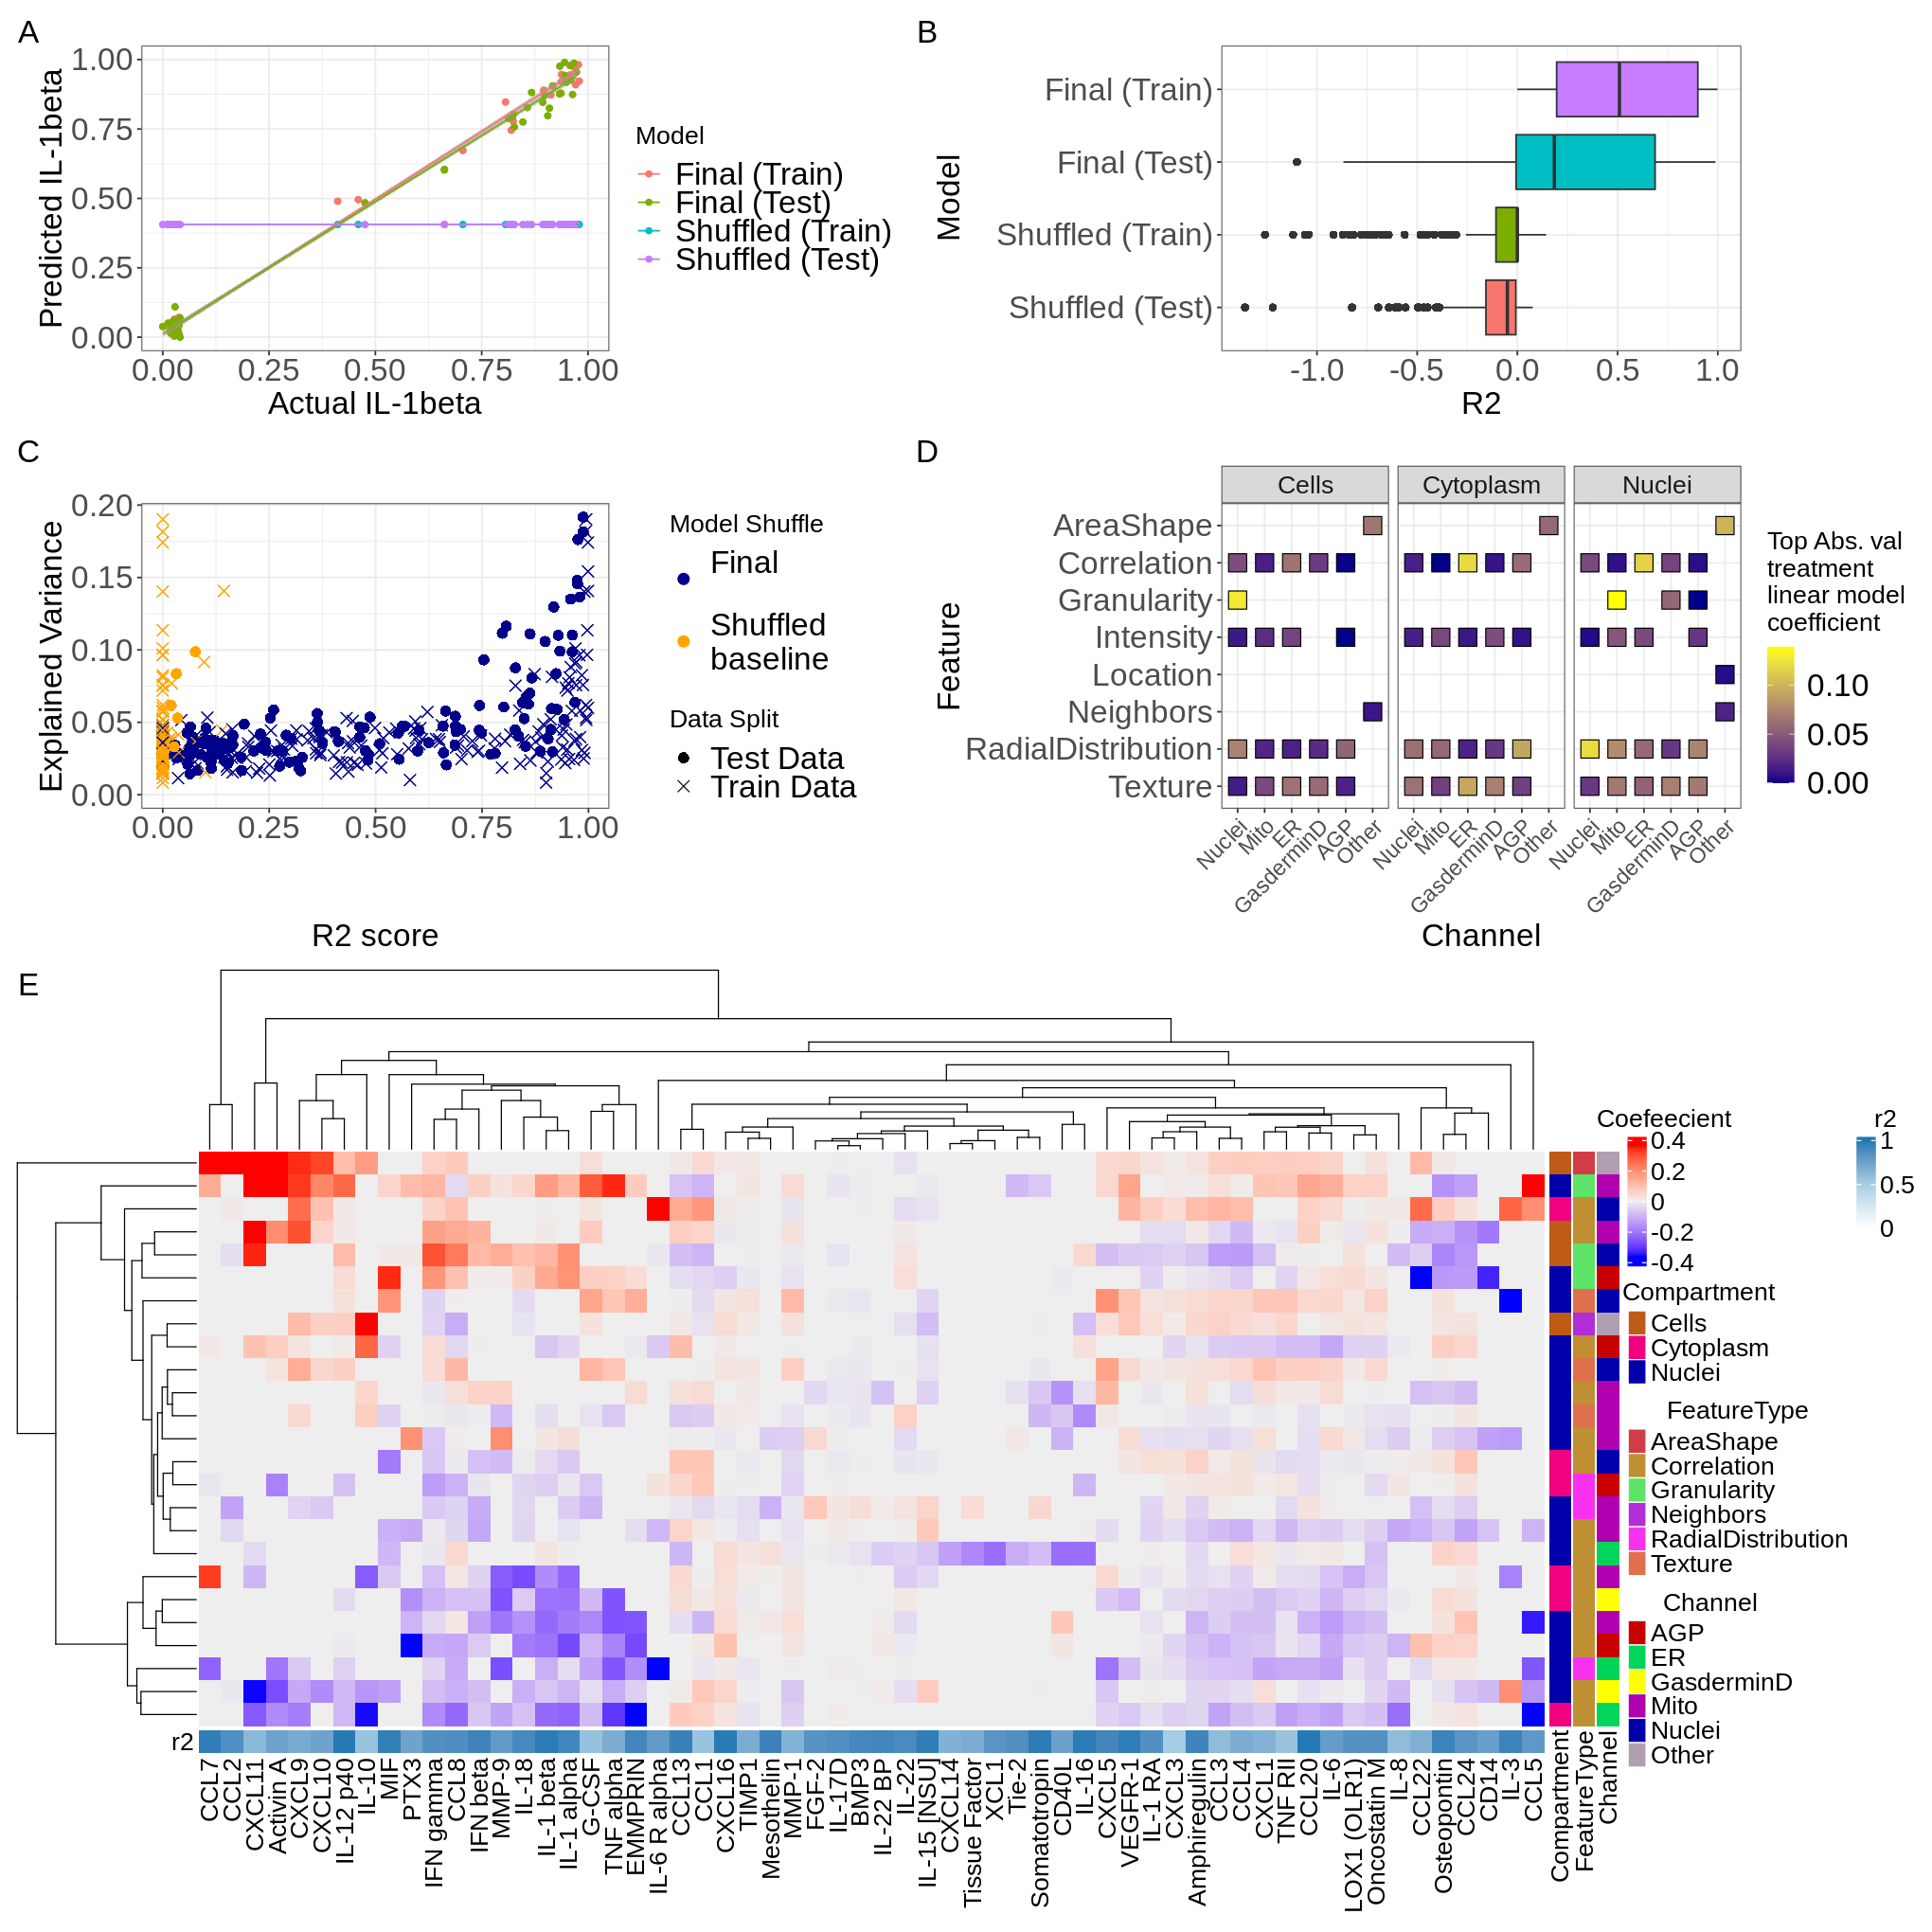

In [46]:

# pathwork layout of each plot ( letters correspond to the order in which the plots are defined below in the pathwork figure)
# where A is the first plot defined and B is the second plot defined, etc.
design <-   "AB
             CD
             EE
             EE
             EE
             "

layout <- c(
    area(t=1, b=1, l=1, r=1), # A
    area(t=1, b=1, l=2, r=2), # B
    area(t=2, b=2, l=1, r=1), # C
    area(t=2, b=2, l=2, r=2), # D
    area(t=3, b=5, l=0, r=2) # E
)
# set plot size
width <- 17
height <- 17
options(repr.plot.width=width, repr.plot.height=height, units = "cm", dpi = 600)
fig4 <- (
    
    IL1beta_a_v_p
    + r2_boxplot
    + variance_r2_plot_local
    + il1beta_final_plot
    + wrap_elements(full = model_heatmap)
    # + model_heatmap
    + plot_layout(design = layout, widths = c(0.9, 1))
    # make bottom plot not align
    + plot_annotation(tag_levels = 'A') & theme(plot.tag = element_text(size = 20))
)
fig4

# save the figure
ggsave(file = paste0(figure_path, "figure4.png"), plot = fig4, width = width, height = height, units = "in", dpi = 600)
ggsave(file = paste0(figure_path, "figure4.svg"), plot = fig4, width = width, height = height, units = "in", dpi = 600)